In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
def col_to_num(string_df):
    for col_name in string_df:
        #     string_df.replace(to_replace="\$", value="", regex=True)
        #     string_df.replace(to_replace="\,", value="", regex=True)
        #     string_df.replace(to_replace="\%", value="", regex=True)
        #     string_df.replace(to_replace="\.", value="", regex=True)

        string_df[col_name] = string_df[col_name].str.replace("$", "", regex=False)
        string_df[col_name] = string_df[col_name].str.replace(",", "", regex=False)
        string_df[col_name] = string_df[col_name].str.replace("%", "", regex=False)
        # string_df[col_name] = string_df[col_name].str.replace('.', '', regex=False)
        # string_df[col_name] = string_df[col_name].str.replace('-', '', regex=False)
        # string_conv = string_df.replace({"$": "", ",": "", "%": ""}, regex=True)

        string_df[col_name] = pd.to_numeric(string_df[col_name])
    return string_df

<IPython.core.display.Javascript object>

In [3]:
econ_path = "data/economic_freedom_index2019_data.csv"
happy_path = "data/2019.csv"
econ = pd.read_csv(econ_path)
happy = pd.read_csv(happy_path)

<IPython.core.display.Javascript object>

In [4]:
econ.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


<IPython.core.display.Javascript object>

In [23]:
econ.info()
# econ["GDP (Billions, PPP)"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2019 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   180 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                183 non-null    float64
 13  Business Freedom    

<IPython.core.display.Javascript object>

In [6]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<IPython.core.display.Javascript object>

In [7]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


<IPython.core.display.Javascript object>

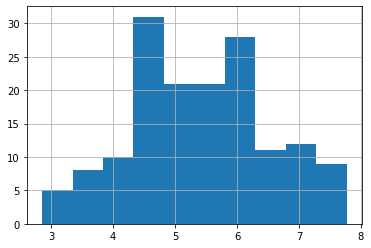

<IPython.core.display.Javascript object>

In [8]:
happy.Score.hist()

In [9]:
stats.describe(happy["Score"])

DescribeResult(nobs=156, minmax=(2.853, 7.769), mean=5.407096153846154, variance=1.2390358423076921, skewness=0.011339558437866055, kurtosis=-0.6272668989701344)

<IPython.core.display.Javascript object>

In [10]:
happy.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<IPython.core.display.Javascript object>

In [19]:
# make a list of columns to convert
# cat_econ = econ.iloc[
#     :, [29,],
# ]

econ["GDP per Capita (PPP)"] = (
    econ["GDP per Capita (PPP)"].dropna().str.replace(r"\D", "").astype(int)
)

# econ.iloc[:, [25, 26, 29, 30, 32,],] =

<IPython.core.display.Javascript object>

In [20]:
econ["GDP per Capita (PPP)"].unique()

array([1.95800000e+03, 1.25070000e+04, 1.52370000e+04, 6.75300000e+03,
       2.08760000e+04, 9.45600000e+03, 5.03340000e+04, 4.98690000e+04,
       1.74920000e+04, 3.11390000e+04, 4.85050000e+04, 4.21100000e+03,
       1.86640000e+04, 1.89310000e+04, 4.65530000e+04, 8.32400000e+03,
       2.27700000e+03, 8.74400000e+03, 7.54700000e+03, 1.27240000e+04,
       1.78280000e+04, 1.56030000e+04, 7.81960000e+04, 2.16870000e+04,
       1.88900000e+03, 6.24400000e+03, 7.35000000e+02, 4.01200000e+03,
       3.66000000e+03, 4.82650000e+04, 6.94400000e+03, 6.77000000e+02,
       2.34400000e+03, 2.45370000e+04, 1.66600000e+04, 1.44850000e+04,
       1.58800000e+03, 7.90000000e+02, 6.64200000e+03, 1.68770000e+04,
       3.88300000e+03, 2.44240000e+04, 1.29200000e+04, 3.70230000e+04,
       3.55120000e+04, 4.98830000e+04, 3.55900000e+03, 1.11020000e+04,
       1.69440000e+04, 1.14820000e+04, 1.26710000e+04, 8.94800000e+03,
       3.60170000e+04, 1.58100000e+03, 3.17500000e+04, 9.88400000e+03,
      

<IPython.core.display.Javascript object>

In [24]:
econ.corr()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Inflation (%),Public Debt (% of GDP)
CountryID,1.000000,-0.037574,-0.019474,0.037610,0.069558,0.032246,0.024981,0.112935,0.024323,-0.046190,...,-0.095527,-0.089311,-0.142239,-0.057784,-0.005043,-0.039135,-0.042981,0.005948,0.117721,-0.069724
World Rank,-0.037574,1.000000,0.737060,-0.938328,-0.862262,-0.783510,-0.777058,0.001651,0.061147,-0.552224,...,0.546004,-0.027692,0.333975,-0.356061,-0.005270,-0.108975,0.004356,0.117509,0.158491,0.024561
Region Rank,-0.019474,0.737060,1.000000,-0.713517,-0.567211,-0.606432,-0.578832,-0.092319,-0.200618,-0.308334,...,0.326258,-0.028547,0.138492,0.002812,0.209026,-0.056843,-0.095489,0.124230,0.087730,0.077280
2019 Score,0.037610,-0.938328,-0.713517,1.000000,0.830409,0.804253,0.763715,0.137279,0.045461,0.563171,...,-0.636272,0.009201,-0.327574,0.298399,-0.129428,0.188446,0.063560,-0.354818,-0.276533,-0.036412
Property Rights,0.069558,-0.862262,-0.567211,0.830409,1.000000,0.822445,0.855428,-0.153225,-0.235260,0.350158,...,-0.492647,0.155824,-0.297578,0.485731,0.098852,-0.074934,0.071906,-0.067005,-0.198389,0.096942
Judical Effectiveness,0.032246,-0.783510,-0.606432,0.804253,0.822445,1.000000,0.878679,-0.113761,-0.135135,0.335370,...,-0.442519,0.182569,-0.216257,0.358283,0.032583,-0.022751,0.028141,-0.153622,-0.155026,0.074158
Government Integrity,0.024981,-0.777058,-0.578832,0.763715,0.855428,0.878679,1.000000,-0.218628,-0.302520,0.315531,...,-0.403071,0.225080,-0.252158,0.421746,0.167446,-0.064211,0.013631,-0.053114,-0.152093,0.103467
Tax Burden,0.112935,0.001651,-0.092319,0.137279,-0.153225,-0.113761,-0.218628,1.000000,0.393912,0.016279,...,-0.265821,-0.898048,-0.555456,-0.588508,-0.403075,0.153649,0.209151,-0.439530,-0.010373,-0.237029
Gov't Spending,0.024323,0.061147,-0.200618,0.045461,-0.235260,-0.135135,-0.302520,0.393912,1.000000,0.082900,...,0.078780,-0.075622,0.216163,-0.654658,-0.887607,-0.050105,0.293019,-0.210885,-0.007844,-0.076822
Fiscal Health,-0.046190,-0.552224,-0.308334,0.563171,0.350158,0.335370,0.315531,0.016279,0.082900,1.000000,...,-0.268554,0.075790,-0.063895,0.154495,-0.141536,0.046226,0.179097,-0.150260,-0.127881,-0.313850


<IPython.core.display.Javascript object>